In [1]:
import torch
from torch import nn

In [ ]:
x = torch.randint(0,2,(5,2))

In [6]:
fpn_strides = [8,16,32]
max_size = 480
points_list = []
# loop over all points at each pyramid level
for l, stride in enumerate(fpn_strides):
    points = torch.arange(0, max_size, stride, dtype=float)
    points += 0.5 * stride
    grid_x, grid_y = torch.meshgrid(points, points, indexing="ij")
    grids = torch.stack([grid_x, grid_y], dim=-1)
    # size: H x W x 2 (height, width)
    points_list.append(grids)

In [24]:
points_list[1].shape

torch.Size([30, 30, 2])

In [38]:
from libs import (
    load_config,
    build_dataset,
    build_dataloader,
)
from pprint import pprint
from torchvision.transforms.functional import to_pil_image

In [30]:
cfg = load_config("configs/voc_fcos.yaml")
pprint(cfg)

{'dataset': {'img_folder': '../data/VOCdevkit/VOC2007/JPEGImages',
             'json_folder': '../data',
             'name': 'VOC2007',
             'test': 'test',
             'train': 'trainval'},
 'devices': ['cuda:0'],
 'input': {'img_max_size': 480,
           'img_mean': [0.485, 0.456, 0.406],
           'img_min_size': [256, 288, 320],
           'img_std': [0.229, 0.224, 0.225]},
 'loader': {'batch_size': 4, 'num_workers': 4},
 'model': {'backbone': 'ResNet18',
           'backbone_out_feats': ['layer2', 'layer3', 'layer4'],
           'backbone_out_feats_dims': [128, 256, 512],
           'fpn_feats_dim': 128,
           'fpn_strides': [8, 16, 32],
           'img_max_size': 480,
           'img_mean': [0.485, 0.456, 0.406],
           'img_min_size': [256, 288, 320],
           'img_std': [0.229, 0.224, 0.225],
           'num_classes': 20,
           'regression_range': [(0, 32), (32, 64), (64, 128)],
           'test_cfg': {'detections_per_img': 100,
                    

In [31]:
train_dataset = build_dataset(
        cfg["dataset"]["name"],
        cfg["dataset"]["train"],
        cfg["dataset"]["img_folder"],
        cfg["dataset"]["json_folder"],
    )
    # data loaders
train_loader = build_dataloader(train_dataset, True, **cfg["loader"])

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


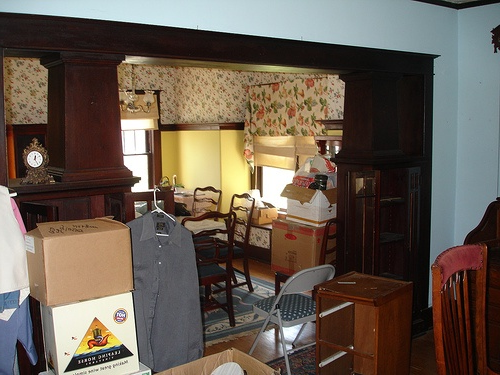

In [39]:
to_pil_image(train_dataset[0][0])

In [89]:
train_dataset[10][1]

{'boxes': tensor([[195., 164., 489., 247.]]),
 'labels': tensor([18]),
 'image_id': tensor([11]),
 'area': tensor([24402]),
 'iscrowd': tensor([0])}

In [41]:
from PIL import ImageDraw

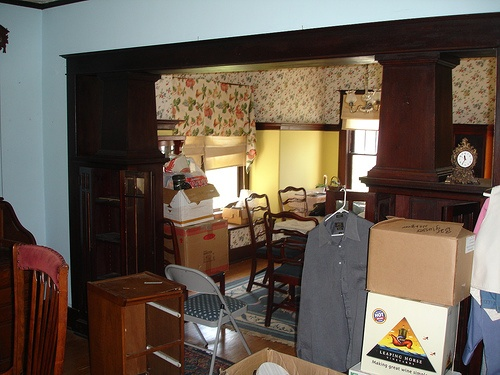

In [75]:
myimg = to_pil_image(train_dataset[0][0])
myimg

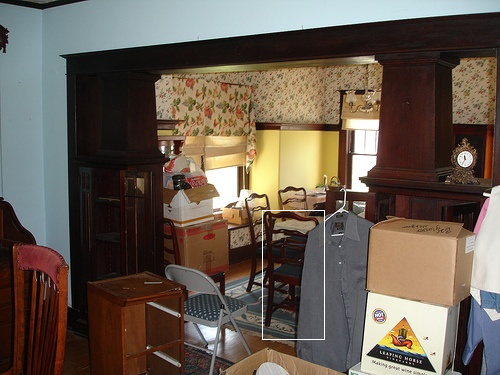

In [76]:
draw = ImageDraw.Draw(myimg)
draw.rectangle(train_dataset[0][1]['boxes'][0].numpy())
myimg